In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Create or connect to SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()


In [9]:
#Create table if not exists
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")


In [10]:
#Insert sample data if empty

cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ("Laptop", 2, 800.0),
        ("Mouse", 5, 20.0),
        ("Laptop", 1, 800.0),
        ("Keyboard", 3, 50.0),
        ("Mouse", 2, 20.0),
        ("Monitor", 4, 150.0),
        ("Headphones", 6, 60.0),
        ("Chair", 2, 120.0),
        ("Desk", 1, 250.0),
        ("Laptop", 1, 850.0),   # price change example
        ("Mousepad", 10, 5.0),
        ("Keyboard", 2, 55.0),  # price change example
        ("Monitor", 1, 160.0),
        ("Laptop Stand", 3, 30.0),
        ("Webcam", 5, 45.0)
    ]
    
    cursor.executemany("""
    INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)
    """, sample_data)
    conn.commit()
    print(f"✅ Inserted {len(sample_data)} sample rows.\n")

✅ Inserted 15 sample rows.



 Run SQL query 

In [11]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""
df = pd.read_sql_query(query, conn)

Print results

In [12]:
total_quantity = df['total_qty'].sum()
total_revenue = df['revenue'].sum()

print("📊 Sales Summary")
print(f"Total Quantity Sold : {total_quantity}")
print(f"Total Revenue       : ${total_revenue:,.2f}\n")

print("Breakdown by Product:")
print(df)

📊 Sales Summary
Total Quantity Sold : 48
Total Revenue       : $5,625.00

Breakdown by Product:
        product  total_qty  revenue
0        Laptop          4   3250.0
1       Monitor          5    760.0
2    Headphones          6    360.0
3      Keyboard          5    260.0
4          Desk          1    250.0
5         Chair          2    240.0
6        Webcam          5    225.0
7         Mouse          7    140.0
8  Laptop Stand          3     90.0
9      Mousepad         10     50.0


Plot revenue by product


 Bar chart saved as 'sales_chart.png'.


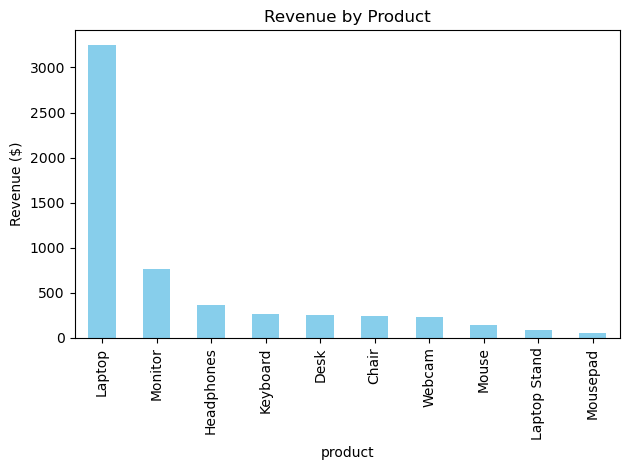

In [13]:
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.ylabel("Revenue ($)")
plt.title("Revenue by Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
print("\n Bar chart saved as 'sales_chart.png'.")

In [14]:
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>

In [ ]:
#Close connection
conn.close()